In [31]:
import pandas as pd

In [32]:
import_path = '/Users/graeme/code/calliope_examples/model_3/timeseries_data/'

In [34]:
raw_data = pd.read_csv(import_path+'regional_demand_2023.csv', index_col=0, parse_dates=True)
raw_data

,S5,S6,T1,T2,T3,T4,T5
2023-01-01 00:00:00,-311.265,-648.524,0.000,-118.129,0.0,-96.004,-8.897
2023-01-01 01:00:00,-303.023,-675.899,0.000,-112.312,0.0,-76.042,-1.144
2023-01-01 02:00:00,-294.585,-677.090,0.000,-102.894,0.0,-86.851,-2.194
2023-01-01 03:00:00,-312.297,-701.772,-21.009,-106.584,0.0,-129.758,-6.835
2023-01-01 04:00:00,-330.375,-742.452,-21.922,-106.463,0.0,-114.180,0.000
...,...,...,...,...,...,...,...
2023-12-31 19:00:00,-585.721,-1194.508,-53.544,-233.357,0.0,-133.616,-27.702
2023-12-31 20:00:00,-544.543,-1093.291,-30.681,-217.617,0.0,-109.128,-27.050
2023-12-31 21:00:00,-504.562,-993.103,-8.136,-196.065,0.0,-130.461,-18.803
2023-12-31 22:00:00,-475.095,-903.547,0.000,-184.659,0.0,-140.995,-13.055


In [35]:
demand_cf = raw_data.sum(axis=1)/raw_data.sum(axis=1).min()
demand_cf*-1.

2023-01-01 00:00:00   -0.360832
2023-01-01 01:00:00   -0.356439
2023-01-01 02:00:00   -0.354973
2023-01-01 03:00:00   -0.389946
2023-01-01 04:00:00   -0.401275
                         ...   
2023-12-31 19:00:00   -0.679812
2023-12-31 20:00:00   -0.616928
2023-12-31 21:00:00   -0.564707
2023-12-31 22:00:00   -0.523896
2023-12-31 23:00:00   -0.494044
Length: 8760, dtype: float64

In [36]:
demand_cf_regional = (demand_cf*-1.).to_frame().rename(columns={0:'region1'})
demand_cf_regional['region2'] = demand_cf_regional['region1']
demand_cf_regional

,region1,region2
2023-01-01 00:00:00,-0.360832,-0.360832
2023-01-01 01:00:00,-0.356439,-0.356439
2023-01-01 02:00:00,-0.354973,-0.354973
2023-01-01 03:00:00,-0.389946,-0.389946
2023-01-01 04:00:00,-0.401275,-0.401275
...,...,...
2023-12-31 19:00:00,-0.679812,-0.679812
2023-12-31 20:00:00,-0.616928,-0.616928
2023-12-31 21:00:00,-0.564707,-0.564707
2023-12-31 22:00:00,-0.523896,-0.523896


In [37]:
demand_cf_regional.to_csv(import_path+'regional_demand.csv', index_label='', date_format='%Y-%m-%d %H:%M')

In [29]:
demand_cf.mean()

0.4122855890396472

<Axes: >

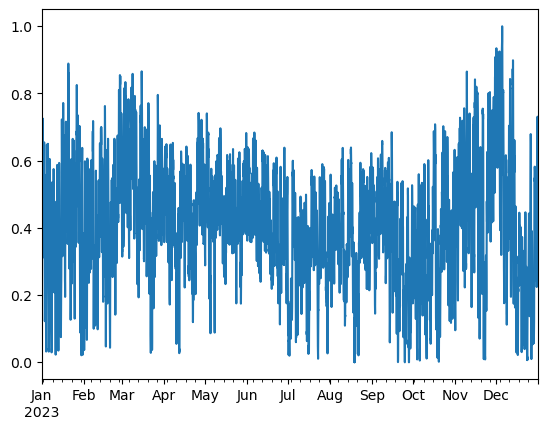

In [30]:
demand_cf.plot()